In [1]:
import pandas as pd
from dateutil import parser
import re

In [5]:
df = pd.read_csv('videos_data.csv')

In [6]:
df.head(2)

,video_id,video_title,published_at,view_count,like_count,comment_count,duration_seconds
0,TsnGd6p9oTk,Installing R and R Studio | R for Data Analyti...,2025-06-17T12:00:48Z,2787,114,9,359.0
1,DsI1vG-kXR8,Best Resources to Learn Data Analytics in 2025,2025-06-10T12:00:19Z,16190,758,33,407.0


In [7]:
df['published_at'] = pd.to_datetime(df['published_at'], utc=True)

In [8]:
df['published_year'] = df['published_at'].dt.year
df['published_month'] = df['published_at'].dt.month_name()
df['published_day'] = df['published_at'].dt.day
df['published_weekday'] = df['published_at'].dt.day_name()
df['published_hour'] = df['published_at'].dt.hour

In [9]:
df.head(2)

,video_id,video_title,published_at,view_count,like_count,comment_count,duration_seconds,published_year,published_month,published_day,published_weekday,published_hour
0,TsnGd6p9oTk,Installing R and R Studio | R for Data Analyti...,2025-06-17 12:00:48+00:00,2787,114,9,359.0,2025,June,17,Tuesday,12
1,DsI1vG-kXR8,Best Resources to Learn Data Analytics in 2025,2025-06-10 12:00:19+00:00,16190,758,33,407.0,2025,June,10,Tuesday,12


In [10]:
df['video_title'] = df['video_title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9 ]', '', str(x)).strip())

In [11]:
df.head(2)

,video_id,video_title,published_at,view_count,like_count,comment_count,duration_seconds,published_year,published_month,published_day,published_weekday,published_hour
0,TsnGd6p9oTk,Installing R and R Studio R for Data Analytic...,2025-06-17 12:00:48+00:00,2787,114,9,359.0,2025,June,17,Tuesday,12
1,DsI1vG-kXR8,Best Resources to Learn Data Analytics in 2025,2025-06-10 12:00:19+00:00,16190,758,33,407.0,2025,June,10,Tuesday,12


In [12]:
def get_duration_category(sec):
    if sec < 240:
        return 'Short'
    elif sec <= 600:
        return 'Medium'
    else:
        return 'Long'

df['duration_category'] = df['duration_seconds'].apply(get_duration_category)

In [13]:
df.head(1)

,video_id,video_title,published_at,view_count,like_count,comment_count,duration_seconds,published_year,published_month,published_day,published_weekday,published_hour,duration_category
0,TsnGd6p9oTk,Installing R and R Studio R for Data Analytic...,2025-06-17 12:00:48+00:00,2787,114,9,359.0,2025,June,17,Tuesday,12,Medium


In [15]:
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

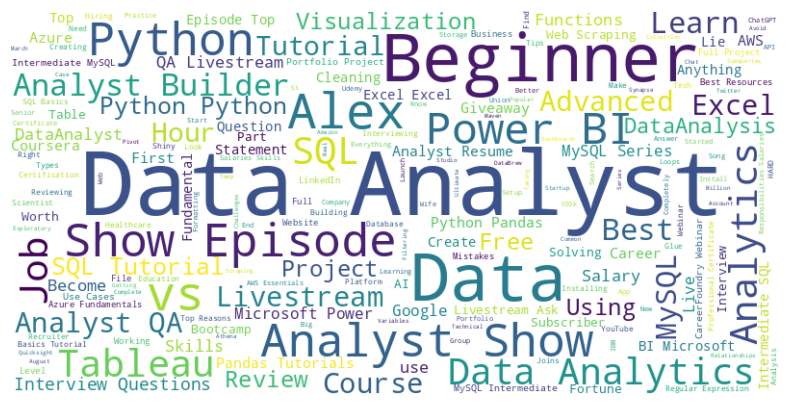

In [16]:
from wordcloud import WordCloud

text = ' '.join(df['video_title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# How many videos were uploaded each year?

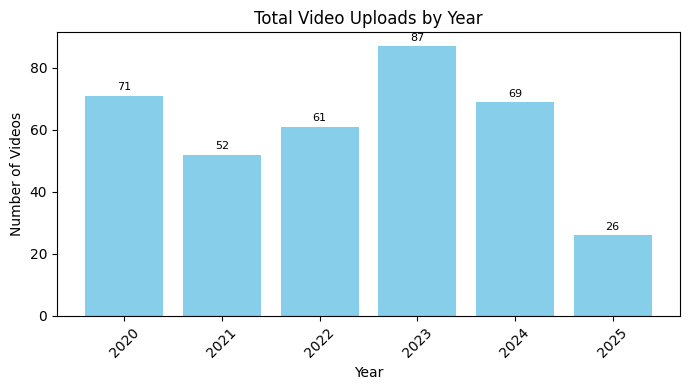

In [17]:
videos_per_year = df['published_year'].value_counts().sort_index()

plt.figure(figsize=(7, 4))
bars = plt.bar(videos_per_year.index, videos_per_year.values, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(int(height)), ha='center', va='bottom', fontsize=8)

plt.title('Total Video Uploads by Year')
plt.xlabel('Year')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Which day of the week gets the most views?

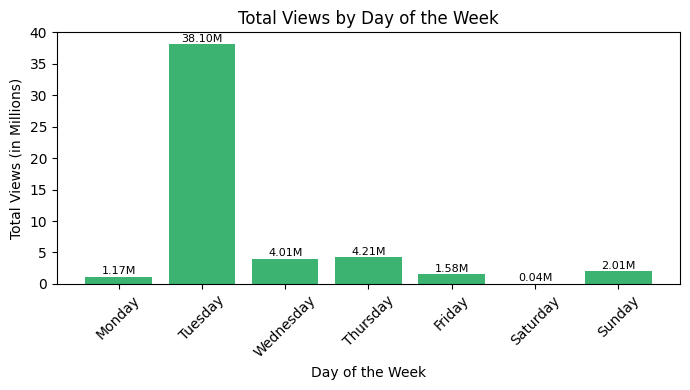

In [18]:
views_by_weekday = df.groupby('published_weekday')['view_count'].sum()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
views_by_weekday = views_by_weekday.reindex(weekday_order)

plt.figure(figsize=(7, 4))
bars = plt.bar(views_by_weekday.index, views_by_weekday.values / 1_000_000, color='mediumseagreen')
for bar in bars:
    height = bar.get_height()
    label = f"{height:.2f}M"
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, label, ha='center', va='bottom', fontsize=8)

plt.title('Total Views by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Views (in Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# What is the average view count per video for each weekday?

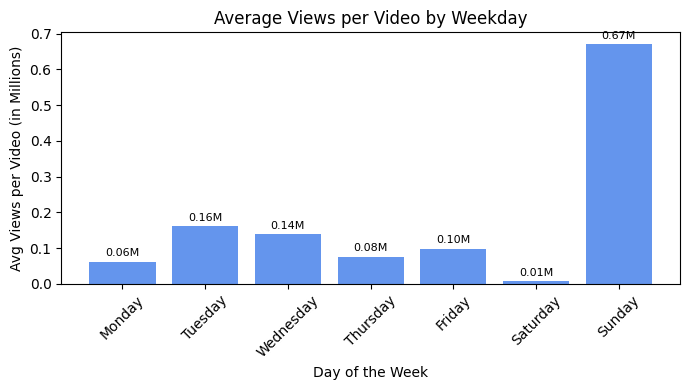

In [19]:
avg_views_by_weekday = df.groupby('published_weekday')['view_count'].mean()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_views_by_weekday = avg_views_by_weekday.reindex(weekday_order)

plt.figure(figsize=(7, 4))
bars = plt.bar(avg_views_by_weekday.index, avg_views_by_weekday.values / 1_000_000, color='cornflowerblue')
for bar in bars:
    height = bar.get_height()
    label = f"{height:.2f}M"
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, label, ha='center', va='bottom', fontsize=8)

plt.title('Average Views per Video by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Avg Views per Video (in Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Which duration category gets the most total views?

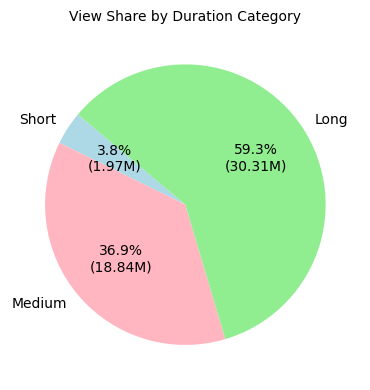

In [20]:
views_by_duration = df.groupby('duration_category')['view_count'].sum()
views_by_duration = views_by_duration.reindex(['Short', 'Medium', 'Long'])

colors = ['lightblue', 'lightpink', 'lightgreen']
labels = views_by_duration.index
values = views_by_duration.values

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        absolute = int(round(pct/100 * total))
        return f'{pct:.1f}%\n({absolute/1_000_000:.2f}M)'
    return my_autopct

plt.figure(figsize=(4, 4))
plt.pie(
    values,
    labels=labels,
    autopct=make_autopct(values),
    startangle=140,
    colors=colors
)
plt.title('View Share by Duration Category', fontsize=10)
plt.tight_layout()
plt.show()

# Which duration category gets the most total likes?

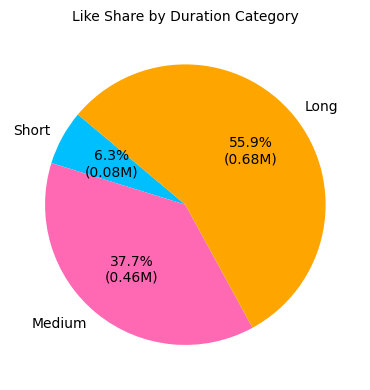

In [21]:
likes_by_duration = df.groupby('duration_category')['like_count'].sum()
likes_by_duration = likes_by_duration.reindex(['Short', 'Medium', 'Long'])

def format_autopct(pct, allvals):
    absolute = int(pct / 100. * sum(allvals))
    return f'{pct:.1f}%\n({absolute / 1_000_000:.2f}M)'

plt.figure(figsize=(4, 4))
plt.pie(
    likes_by_duration.values,
    labels=likes_by_duration.index,
    autopct=lambda pct: format_autopct(pct, likes_by_duration.values),
    startangle=140,
    colors=['deepskyblue', 'hotpink', 'orange']
)
plt.title('Like Share by Duration Category', fontsize=10)
plt.tight_layout()
plt.show()

# Which top 3 videos received the most comments?

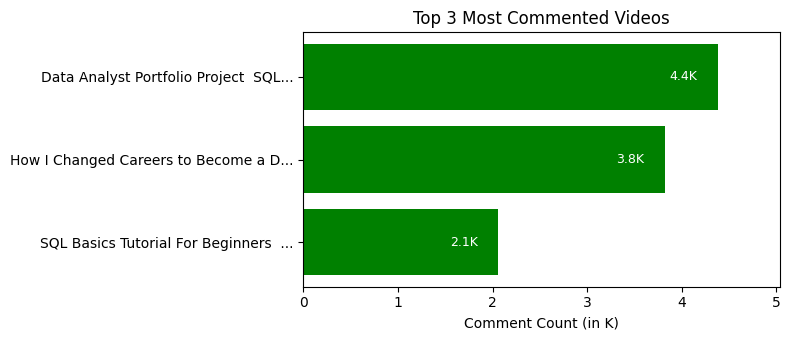

In [22]:
top_commented = df.sort_values(by='comment_count', ascending=False).head(3).copy()
top_commented['short_title'] = top_commented['video_title'].str.slice(0, 35) + '...'
top_commented['comment_k'] = top_commented['comment_count'] / 1000

plt.figure(figsize=(8, 3.5))
bars = plt.barh(top_commented['short_title'], top_commented['comment_k'], color='green')

max_val = top_commented['comment_k'].max()
plt.xlim(0, max_val * 1.15)

for bar in bars:
    width = bar.get_width()
    plt.text(width - (max_val * 0.05), bar.get_y() + bar.get_height()/2,
             f'{width:.1f}K', va='center', ha='right', color='white', fontsize=9)

plt.title('Top 3 Most Commented Videos', fontsize=12)
plt.xlabel('Comment Count (in K)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# At which hour of the day are the most videos published?

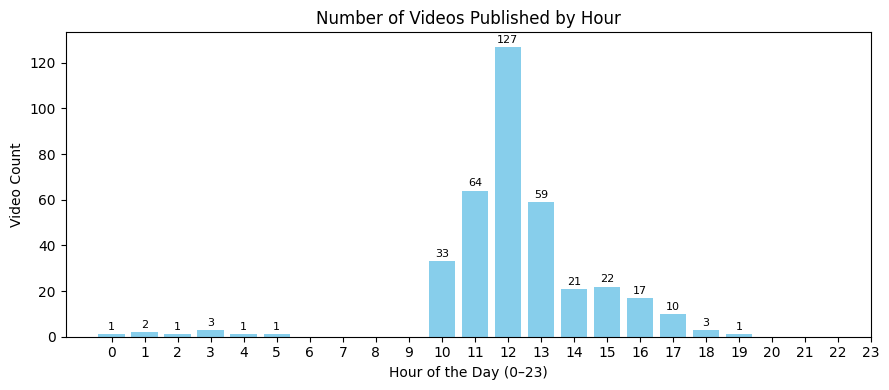

In [23]:
df['published_hour'] = pd.to_datetime(df['published_at']).dt.hour

videos_by_hour = df['published_hour'].value_counts().sort_index()

plt.figure(figsize=(9, 4))
bars = plt.bar(videos_by_hour.index, videos_by_hour.values, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, str(height), ha='center', va='bottom', fontsize=8)

plt.title('Number of Videos Published by Hour')
plt.xlabel('Hour of the Day (0–23)')
plt.ylabel('Video Count')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# What is the average duration of the most successful videos?

In [24]:
top_videos = df.sort_values(by='view_count', ascending=False).head(10)
avg_duration_sec = top_videos['duration_seconds'].mean()

minutes = int(avg_duration_sec // 60)
seconds = int(avg_duration_sec % 60)

print(f"Average Duration of Top 10 Videos: {minutes} minutes, {seconds} seconds")

Average Duration of Top 10 Videos: 19 minutes, 18 seconds


# Top 3 high-view videos

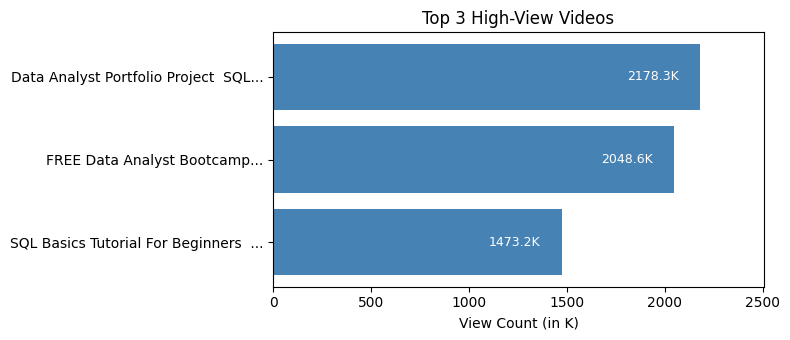

In [25]:
import matplotlib.pyplot as plt

top_3 = df.sort_values(by='view_count', ascending=False).head(3).copy()
top_3['short_title'] = top_3['video_title'].str.slice(0, 35) + '...'
top_3['view_k'] = top_3['view_count'] / 1000

plt.figure(figsize=(8, 3.5))
bars = plt.barh(top_3['short_title'], top_3['view_k'], color='steelblue')

max_value = top_3['view_k'].max()
plt.xlim(0, max_value * 1.15)

for bar in bars:
    width = bar.get_width()
    plt.text(width - (max_value * 0.05), bar.get_y() + bar.get_height()/2,
             f'{width:.1f}K', va='center', ha='right', color='white', fontsize=9)

plt.title('Top 3 High-View Videos', fontsize=12)
plt.xlabel('View Count (in K)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Top 3 Like Videos

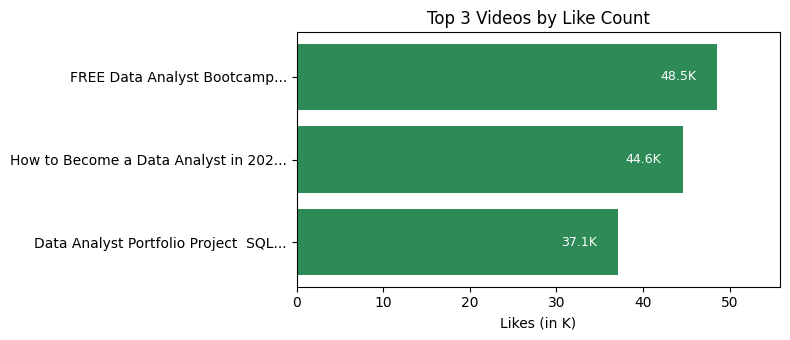

In [26]:
top_3_likes = df.sort_values(by='like_count', ascending=False).head(3).copy()
top_3_likes['short_title'] = top_3_likes['video_title'].str.slice(0, 35) + '...'
top_3_likes['likes_k'] = top_3_likes['like_count'] / 1000

plt.figure(figsize=(8, 3.5))
bars = plt.barh(top_3_likes['short_title'], top_3_likes['likes_k'], color='seagreen')

max_likes = top_3_likes['likes_k'].max()
plt.xlim(0, max_likes * 1.15)

for bar in bars:
    width = bar.get_width()
    plt.text(width - (max_likes * 0.05), bar.get_y() + bar.get_height()/2,
             f'{width:.1f}K', va='center', ha='right', color='white', fontsize=9)

plt.title('Top 3 Videos by Like Count', fontsize=12)
plt.xlabel('Likes (in K)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Which 3 videos got the least number of views?

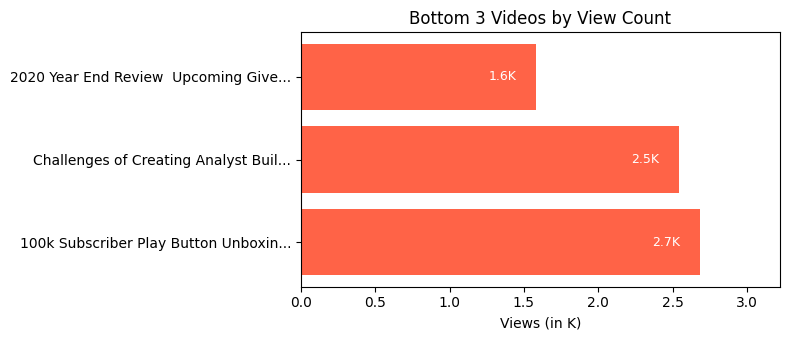

In [27]:
bottom_3 = df.sort_values(by='view_count', ascending=True).head(3).copy()
bottom_3['short_title'] = bottom_3['video_title'].str.slice(0, 35) + '...'
bottom_3['view_k'] = bottom_3['view_count'] / 1000

plt.figure(figsize=(8, 3.5))
bars = plt.barh(bottom_3['short_title'], bottom_3['view_k'], color='tomato')

max_val = bottom_3['view_k'].max()
plt.xlim(0, max_val * 1.2)

for bar in bars:
    width = bar.get_width()
    plt.text(width - (max_val * 0.05), bar.get_y() + bar.get_height()/2,
             f'{width:.1f}K', va='center', ha='right', color='white', fontsize=9)

plt.title('Bottom 3 Videos by View Count', fontsize=12)
plt.xlabel('Views (in K)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [28]:
df.to_csv("videos.csv", index=False)